<a href="https://colab.research.google.com/github/DysnomiaBorealis/SMS_SPAM_ML_MODEL/blob/main/SMS_Spam_Detection_using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
keras_bert_keras_bert_base_en_2_path = kagglehub.model_download('keras/bert/Keras/bert_base_en/2')

print('Data source import complete.')


Data source import complete.


In [ ]:
! wget https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv

--2025-04-10 18:00:00--  https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248354 (243K) [text/plain]
Saving to: ‘indo_spam.csv’

indo_spam.csv       100%[===================>] 242.53K  --.-KB/s    in 0.004s  

2025-04-10 18:00:00 (62.3 MB/s) - ‘indo_spam.csv’ saved [248354/248354]



In [ ]:
! pip install -U accelerate
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
!pip install evaluate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.4 MB/s eta 0:00:00


In [ ]:
# load data
df = pd.read_csv('indo_spam.csv')
df.head()

,Kategori,Pesan
0,Spam,(Bank Granit menerbitkan Strong-Buy) PILIHAN E...
1,ham,(Saya harus menambahkan bahwa saya tidak terla...
2,ham,"(Yang mengatakan, bisakah Anda mengirim sms ke..."
3,Spam,* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87...
4,Spam,**PESAN GRATIS**Terima kasih telah menggunakan...


In [ ]:
df['label'] = df['Kategori'].apply(lambda x:0 if x=="ham" else 1)

In [ ]:
df = df.drop(columns=['Kategori'])
df.rename(columns={"Pesan": "Teks"}, inplace=True)
df

,Teks,label
0,(Bank Granit menerbitkan Strong-Buy) PILIHAN E...,1
1,(Saya harus menambahkan bahwa saya tidak terla...,0
2,"(Yang mengatakan, bisakah Anda mengirim sms ke...",0
3,* GRATIS * POLIFONIK RINGTONE Teks SUPER ke 87...,1
4,**PESAN GRATIS**Terima kasih telah menggunakan...,1
...,...,...
2040,"Yup, tidak perlu. Aku akan jus menunggu 4 e hu...",0
2041,Yup... Dari apa yang saya remb... Saya pikir s...,0
2042,Yup... Bagaimana Ã 1/4 noe leh ...,0
2043,Yup... Ok i go home melihat timing maka saya m...,0


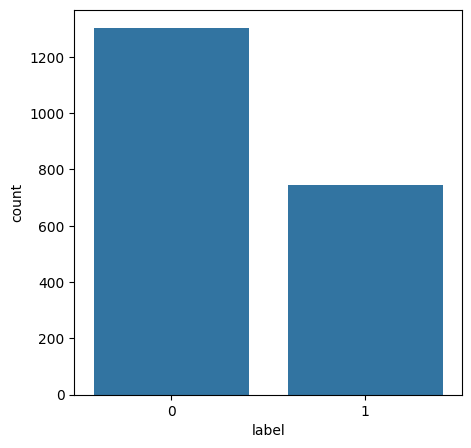

In [ ]:
# check count and unique and top values and their frequency
plt.figure(figsize=(5, 5))
sns.countplot(x=df['label'])
plt.show()

In [ ]:
df['label'].value_counts()

,count
label,
0,1302
1,743


In [ ]:
df.sample(10)

,Teks,label
168,Bloomberg -Pusat pesan +447797706009 Mengapa m...,1
269,Gila ar dia sudah menikah. Ãœ seperti gd menca...,0
1495,"Terima kasih atas pesanan nada dering Anda, no...",1
452,RINGTONE GRATIS TEKS PERTAMA ke 87131 untuk po...,1
35,4mths setengah harga sewa garis oranye & ponse...,1
634,Hei aku akan terlambat ah ... Sampai jumpa di ...,0
1124,Pantas saja... Cos i dun rem melihat mobil per...,0
562,Apakah ponsel Anda 10 bln? Perbarui ke ponsel ...,1
141,"Sesuai permintaan Anda, 'Melle Melle (Oru Minn...",0
710,Bagaimana abt membuat beberapa foto lebih besar?,0


Cleaning

In [ ]:
df['Teks']=df['Teks'].str.lower()
df

,Teks,label
0,(bank granit menerbitkan strong-buy) pilihan e...,1
1,(saya harus menambahkan bahwa saya tidak terla...,0
2,"(yang mengatakan, bisakah anda mengirim sms ke...",0
3,* gratis * polifonik ringtone teks super ke 87...,1
4,**pesan gratis**terima kasih telah menggunakan...,1
...,...,...
2040,"yup, tidak perlu. aku akan jus menunggu 4 e hu...",0
2041,yup... dari apa yang saya remb... saya pikir s...,0
2042,yup... bagaimana ã 1/4 noe leh ...,0
2043,yup... ok i go home melihat timing maka saya m...,0


In [ ]:
import re

In [ ]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [ ]:
def cleaning_text(text):
  return text.translate(str.maketrans("","",string.punctuation))
  return text.strip()
  return re.sub('\s+',' ',text)
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
df['Teks']=df['Teks'].apply(remove_tweet_special)
df

,Teks,label
0,bank granit menerbitkan strong buy pilihan eks...,1
1,saya harus menambahkan bahwa saya tidak terlal...,0
2,yang mengatakan bisakah anda mengirim sms kepa...,0
3,gratis polifonik ringtone teks super ke untuk ...,1
4,pesan gratis terima kasih telah menggunakan la...,1
...,...,...
2040,yup tidak perlu aku akan jus menunggu e hujan ...,0
2041,yup dari apa yang saya remb saya pikir seharus...,0
2042,yup bagaimana noe leh,0
2043,yup ok i go home melihat timing maka saya msg ...,0


In [ ]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

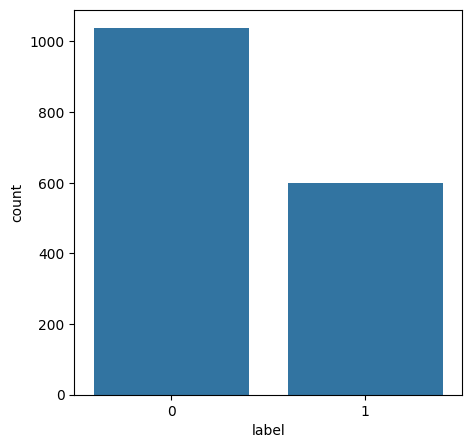

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

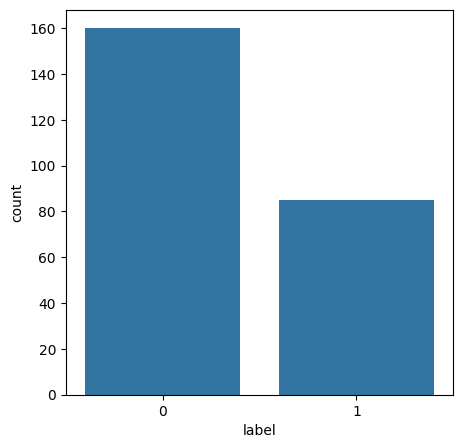

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

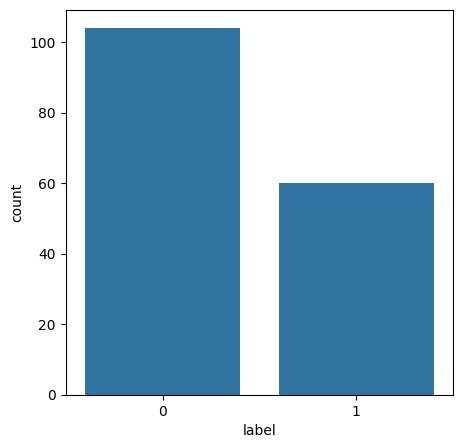

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 1636
Total Val  : 245
Total Test : 164


In [ ]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [ ]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(text):
    return tokenizer(text["Teks"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1636 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [ ]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

In [ ]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adikhidung (adikhidung-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.237600
1000,0.060000


In [ ]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 0.03420662879943848,
 'eval_accuracy': 0.9959183673469387,
 'eval_runtime': 3.7654,
 'eval_samples_per_second': 65.067,
 'eval_steps_per_second': 8.233,
 'epoch': 3.0}

In [ ]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [ ]:
actual_label = df_test['label']

In [ ]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.98      0.97      0.98        61

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



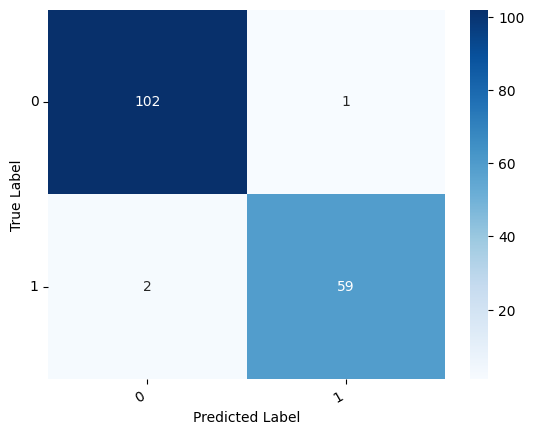

In [ ]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

In [ ]:
model.save_pretrained("model")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [ ]:
trainer = Trainer(model=model)

In [ ]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [ ]:
predict("""
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Assalamualaikum Pak. Ini dg nama1 ilkom 2012. Maaf Pak td saya ninggalin proposal di meja Bapak di atas printer. Terima kasih Pak.
""")

Predicted: Ham [0]


In [ ]:
# === TFLite Conversion (Based on User's Provided Script State) ===
print("\n=== Starting TFLite Conversion (Based on User Script) ===")
print("WARNING: Converting the model as loaded at the end of the user's script.")
print("WARNING: If the 'trainer.train()' step was omitted or failed, the classifier head is likely untrained.")

# --- Ensure necessary libraries are installed/imported ---
try:
    import tensorflow as tf
    import numpy as np
    from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
    import os
    print(f"TensorFlow version: {tf.__version__}")
except ImportError:
    print("ERROR: Required libraries (tensorflow, transformers, numpy) not found.")
    # You might need to run !pip install tensorflow transformers numpy
    exit()

# --- Configuration (Must match assumptions from user script) ---
# Directory where the user script saved the (potentially untrained) model
SAVED_MODEL_FOR_CONVERSION = "model"
# Tokenizer corresponding to the model loaded *initially* in the user script
TOKENIZER_NAME_FOR_CONVERSION = "indobenchmark/indobert-base-p2"
TFLITE_OUTPUT_PATH = "./model_from_user_script.tflite"
MAX_LENGTH = 256 # Max length used in the user script's tokenize_function

# --- Fix 1: Define the Tokenizer ---
# This was missing in the original script but is needed here.
try:
    print(f"\nLoading tokenizer: {TOKENIZER_NAME_FOR_CONVERSION}")
    # Use the tokenizer corresponding to the base model
    tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_NAME_FOR_CONVERSION)
    print("Tokenizer loaded.")
except Exception as e:
    print(f"ERROR: Failed to load tokenizer '{TOKENIZER_NAME_FOR_CONVERSION}': {e}")
    raise e # Stop if tokenizer fails

# --- Fix 2: Load the model intended for conversion as TF model ---
# The user script saves the PyTorch model, so load it back as TF
try:
    print(f"\nLoading model from '{SAVED_MODEL_FOR_CONVERSION}' as TF model...")
    # Load the model saved by model.save_pretrained("model") as a TF model
    tf_model = TFAutoModelForSequenceClassification.from_pretrained(SAVED_MODEL_FOR_CONVERSION, from_pt=True)
    print("TF model loaded successfully for conversion.")
except Exception as e:
    print(f"ERROR: Failed to load TF model from '{SAVED_MODEL_FOR_CONVERSION}': {e}")
    print("Ensure the 'model' directory exists and contains valid model files (config.json, pytorch_model.bin/model.safetensors).")
    raise e

# --- Define Input Signature ---
print(f"Defining input signature with MAX_LENGTH = {MAX_LENGTH}")
try:
    input_signature = [
        tf.TensorSpec(shape=(1, MAX_LENGTH), dtype=tf.int32, name='input_ids'),
        tf.TensorSpec(shape=(1, MAX_LENGTH), dtype=tf.int32, name='attention_mask')
        # Add token_type_ids if needed for this IndoBERT model
        # tf.TensorSpec(shape=(1, MAX_LENGTH), dtype=tf.int32, name='token_type_ids')
    ]
except Exception as e:
     print(f"Error defining TensorSpec, check MAX_LENGTH: {e}")
     raise e

# --- Create Concrete Function ---
try:
    # Arguments must match input_signature
    @tf.function(input_signature=input_signature)
    def serving_function(input_ids, attention_mask):
        input_dict = {'input_ids': input_ids, 'attention_mask': attention_mask}
        # Add token_type_ids if needed
        outputs = tf_model(input_dict)
        return {"logits": outputs.logits} # Standard output format

    concrete_func = serving_function.get_concrete_function()
    print("Concrete function created.")
except Exception as e:
    print(f"Error creating concrete function: {e}")
    raise e

# --- Initialize Converter ---
print("\nInitializing TFLiteConverter...")
try:
    converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func], tf_model)
except Exception as e:
     print(f"Error initializing converter: {e}")
     raise e

# --- Apply Optimizations ---
print("Applying default optimizations...")
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# --- Convert ---
print("Starting conversion process...")
try:
    tflite_model = converter.convert()
    print("Conversion successful!")
except Exception as e:
    print(f"\nError during TFLite conversion: {e}")
    raise e

# --- Save TFLite Model ---
print(f"Saving TFLite model to: {TFLITE_OUTPUT_PATH}")
try:
    with open(TFLITE_OUTPUT_PATH, 'wb') as f:
        f.write(tflite_model)
    print("TFLite model saved.")
except Exception as e:
    print(f"Error saving TFLite file: {e}")
    raise e

# === Verification (Optional - Less Meaningful for Untrained Model) ===
print("\n=== Verifying TFLite Model (Note: Based on potentially untrained model state) ===")
try:
    interpreter = tf.lite.Interpreter(model_path=TFLITE_OUTPUT_PATH)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    verification_text = """
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
    """
    # Apply minimal cleaning similar to user script intent (assuming lowercase was main goal)
    cleaned_verification_text = str(verification_text).lower().strip()

    # Tokenize using the loaded tokenizer
    tf_inputs_verify = tokenizer(
        cleaned_verification_text, return_tensors="tf", padding="max_length",
        truncation=True, max_length=MAX_LENGTH
    )

    # Set input tensors
    interpreter.set_tensor(input_details[0]['index'], tf_inputs_verify['input_ids'])
    interpreter.set_tensor(input_details[1]['index'], tf_inputs_verify['attention_mask'])
    # Set token_type_ids if needed

    # Invoke
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    tflite_pred_index = np.argmax(tflite_results, axis=-1)[0]
    tflite_label = "Spam" if tflite_pred_index == 1 else "ham" # Assuming 1=Spam still

    print(f"\n--- Verification Input: '{cleaned_verification_text}' ---")
    print(f"TFLite Model Prediction: {tflite_label} [{tflite_pred_index}]")
    print("(Remember this prediction is likely based on an untrained classifier head)")

except Exception as e:
    print(f"\nAn error occurred during TFLite verification: {e}")

print("\n=== TFLite Conversion Finished ===")


# === Download TFLite and Vocab Files ===
print("\n=== Downloading Files ===")
from google.colab import files

# 1. Download TFLite
if os.path.exists(TFLITE_OUTPUT_PATH):
    print(f"Downloading TFLite model: {TFLITE_OUTPUT_PATH}")
    files.download(TFLITE_OUTPUT_PATH)
else:
    print(f"ERROR: TFLite file not found at {TFLITE_OUTPUT_PATH}")

# 2. Download Vocab file (Need to save it first from tokenizer)
VOCAB_SAVE_DIR = "./tokenizer_vocab_for_download" # Temporary place to save vocab
VOCAB_FILE_PATH = os.path.join(VOCAB_SAVE_DIR, "vocab.txt")
try:
    print(f"\nSaving vocabulary file for download...")
    tokenizer.save_vocabulary(VOCAB_SAVE_DIR) # Saves vocab.txt inside the dir
    if os.path.exists(VOCAB_FILE_PATH):
        print(f"Downloading vocabulary file: {VOCAB_FILE_PATH}")
        files.download(VOCAB_FILE_PATH)
    else:
        print(f"ERROR: Failed to save or find vocab.txt in {VOCAB_SAVE_DIR}")
except Exception as e:
    print(f"Error saving/downloading vocab file: {e}")


=== Starting TFLite Conversion (Based on User Script) ===
TensorFlow version: 2.18.0

Loading tokenizer: indobenchmark/indobert-base-p2
Tokenizer loaded.

Loading model from 'model' as TF model...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


TF model loaded successfully for conversion.
Defining input signature with MAX_LENGTH = 256
Concrete function created.

Initializing TFLiteConverter...
Applying default optimizations...
Starting conversion process...
Conversion successful!
Saving TFLite model to: ./model_from_user_script.tflite
TFLite model saved.

=== Verifying TFLite Model (Note: Based on potentially untrained model state) ===

--- Verification Input: 'selamat!! anda mendpt hadiah rp. 75 juta. dari telkomsel point "edisi september" hub kntr pusat' ---
TFLite Model Prediction: ham [0]
(Remember this prediction is likely based on an untrained classifier head)

=== TFLite Conversion Finished ===

=== Downloading Files ===


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saving vocabulary file for download...
Error saving/downloading vocab file: No such file or directory (os error 2)
